In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import json
from collections import defaultdict
import pickle
import os
import matplotlib.pyplot as plt
import glob
import pickle

import keras
from keras import layers
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [63]:
from joblib import dump, load
from tensorflow.keras.models import clone_model
from sklearn.metrics import classification_report


In [3]:
# !pip install keras==2.12.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
MODEL_DATA_DIR = "/content/drive/MyDrive/Applied ML Group 18/model_data/"

X_TRAIN2_FILE = MODEL_DATA_DIR + 'x_train_2.csv'
Y_TRAIN2_FILE = MODEL_DATA_DIR + 'y_train_2.csv'
X_TEST2_FILE = MODEL_DATA_DIR + 'x_test_2.csv'
Y_TEST2_FILE = MODEL_DATA_DIR + 'y_test_2.csv'
LABEL_MAP_FILE = MODEL_DATA_DIR +  'label_map.csv'

X_train = pd.read_csv(X_TRAIN2_FILE, index_col=0)
y_train = pd.read_csv(Y_TRAIN2_FILE, index_col=0)
X_test = pd.read_csv(X_TEST2_FILE, index_col=0)
y_test = pd.read_csv(Y_TEST2_FILE, index_col=0)
LABEL_MAP = pd.read_csv(LABEL_MAP_FILE)

X_train.head()

,Age,Hours per day,Anxiety,Depression,Insomnia,OCD,Frequency [Classical] ordinal,Frequency [Country] ordinal,Frequency [EDM] ordinal,Frequency [Folk] ordinal,...,Exploratory ordinal,Music effects ordinal,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,Primary streaming service_Pandora,Primary streaming service_Spotify,Primary streaming service_YouTube Music,Foreign languages_No,Foreign languages_Yes
0,22,2,7,7,8,3,1,0,1,1,...,1,1,0,0,0,0,0,1,1,0
1,18,2,5,7,2,0,2,1,2,0,...,0,1,0,0,0,0,1,0,1,0
2,31,2,8,9,6,2,1,1,0,1,...,0,1,0,0,0,0,1,0,1,0
3,17,3,8,10,9,2,1,1,0,2,...,0,1,1,0,0,0,0,0,1,0
4,18,3,8,9,0,0,1,0,0,2,...,0,1,0,0,0,0,1,0,0,1


In [7]:
y_train.head()

,Fav genre
0,8.0
1,8.0
2,4.0
3,8.0
4,9.0


In [8]:
LABEL_MAP

,Encoded Value,Fav genre
0,0,Video game music
1,1,Jazz
2,2,R&B
3,3,K pop
4,4,Rock
5,5,Country
6,6,EDM
7,7,Hip hop
8,8,Pop
9,9,Rap


In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (1907, 35)
X_val shape:  (477, 35)
X_test shape:  (146, 35)


In [5]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train['Fav genre'])
X_test = np.asarray(X_test)
y_test = np.asarray(y_test['Fav genre'])
X_val = np.asarray(X_val)
y_val = np.asarray(y_val['Fav genre'])

X_train

array([[26,  2,  7, ...,  0,  0,  1],
       [65,  0,  3, ...,  0,  0,  0],
       [28,  1,  2, ...,  0,  1,  0],
       ...,
       [19,  1,  0, ...,  0,  0,  0],
       [18,  2,  7, ...,  0,  1,  0],
       [17,  2,  3, ...,  0,  1,  0]])

In [11]:
X_val

array([[58, 14,  3, ...,  0,  1,  0],
       [23,  2,  7, ...,  0,  0,  1],
       [20,  3,  6, ...,  0,  0,  0],
       ...,
       [39,  4,  4, ...,  0,  0,  0],
       [59,  1,  6, ...,  0,  1,  0],
       [17,  2,  3, ...,  0,  1,  0]])

In [12]:
y_train

array([ 4., 14.,  7., ...,  5.,  6.,  2.])

In [6]:
num_classes = LABEL_MAP.shape[0] # number of possible targets

# reshape data into [batch_size, time_steps, input_dim]
# batch_size = # of samples in the dataset
# time_steps = # of features in the dataset
x_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
x_val_reshaped = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
x_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Reshaped X_train: ", x_train_reshaped.shape)
print("Reshaped X_val: ", x_val_reshaped.shape)
print("Reshaped X_test: ", x_test_reshaped.shape)

Reshaped X_train:  (1907, 35, 1)
Reshaped X_val:  (477, 35, 1)
Reshaped X_test:  (146, 35, 1)


In [7]:
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)
y_val_binary = keras.utils.to_categorical(y_val, num_classes)

In [18]:
print(x_train_reshaped[0])
print(y_train_binary[0])

[[26]
 [ 2]
 [ 7]
 [ 5]
 [ 6]
 [ 0]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [ 0]
 [ 1]
 [ 0]
 [ 0]
 [ 0]
 [ 2]
 [ 2]
 [ 1]
 [ 0]
 [ 1]
 [ 3]
 [ 3]
 [ 0]
 [ 0]
 [ 1]
 [ 0]
 [ 1]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 0]
 [ 0]
 [ 1]]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
SAVE_DIR = "/content/drive/MyDrive/Applied ML Group 18/cnn_models/"
CHECKPOINT_FILENAME = "cnn-val-best"
EARLY_STOPPING_LIMIT = 5
BATCH_SIZE = 16
EPOCHS = 30

In [9]:
model = Sequential(name="conv1d_model")
model.add(layers.Input(shape=(x_train_reshaped.shape[1],x_train_reshaped.shape[2])))
model.add(layers.Conv1D(32, kernel_size=(3), activation='relu', name="Conv1D_1"))
model.add(layers.MaxPooling1D(pool_size=(2), name="MaxPooling1D_1"))
model.add(layers.Dropout(0.5))

model.add(layers.Conv1D(128, kernel_size=(3), activation='relu', name="Conv1D_2"))
model.add(layers.MaxPooling1D(pool_size=2, name="MaxPooling1D_2"))
model.add(layers.BatchNormalization())
model.add(layers.Flatten(name="Flatten_1"))

model.add(layers.Dense(64, activation='relu', name="Dense_1"))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_classes, activation='softmax', name="Dense_3"))

initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "conv1d_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 33, 32)            128       
                                                                 
 MaxPooling1D_1 (MaxPooling1  (None, 16, 32)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 32)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 14, 128)           12416     
                                                                 
 MaxPooling1D_2 (MaxPooling1  (None, 7, 128)           0         
 D)                                                              
                                                                 
 batch_normalization (BatchN  (None, 7, 128)          

In [222]:
# model = keras.models.load_model(SAVE_DIR + CHECKPOINT_FILENAME + ".h5")

In [223]:
history = model.fit(x_train_reshaped, y_train_binary,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(x_val_reshaped, y_val_binary))

Epoch 1/30
120/120 [==============================] - 3s 8ms/step - loss: 1.6942 - accuracy: 0.4730 - val_loss: 1.4176 - val_accuracy: 0.5052
Epoch 2/30
120/120 [==============================] - 1s 6ms/step - loss: 0.9146 - accuracy: 0.7079 - val_loss: 0.7213 - val_accuracy: 0.7547
Epoch 3/30
120/120 [==============================] - 1s 7ms/step - loss: 0.7866 - accuracy: 0.7619 - val_loss: 0.5557 - val_accuracy: 0.8344
Epoch 4/30
120/120 [==============================] - 1s 8ms/step - loss: 0.8139 - accuracy: 0.7415 - val_loss: 0.4907 - val_accuracy: 0.8491
Epoch 5/30
120/120 [==============================] - 1s 10ms/step - loss: 0.6701 - accuracy: 0.7871 - val_loss: 0.7049 - val_accuracy: 0.8029
Epoch 6/30
120/120 [==============================] - 1s 11ms/step - loss: 0.6082 - accuracy: 0.8112 - val_loss: 0.4158 - val_accuracy: 0.8616
Epoch 7/30
120/120 [==============================] - 1s 11ms/step - loss: 0.5667 - accuracy: 0.8186 - val_loss: 0.4648 - val_accuracy: 0.8428
Epo

In [224]:
model.save(SAVE_DIR + CHECKPOINT_FILENAME + ".h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [225]:
test_score = model.evaluate(x_test_reshaped, y_test_binary)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

5/5 [==============================] - 0s 5ms/step - loss: 1.7436 - accuracy: 0.5685
Test loss: 1.7435781955718994
Test accuracy: 0.568493127822876


In [226]:
preds = model.predict(x_test_reshaped, verbose=1)
pred_classes=np.argmax(preds,axis=1)

5/5 [==============================] - 0s 5ms/step


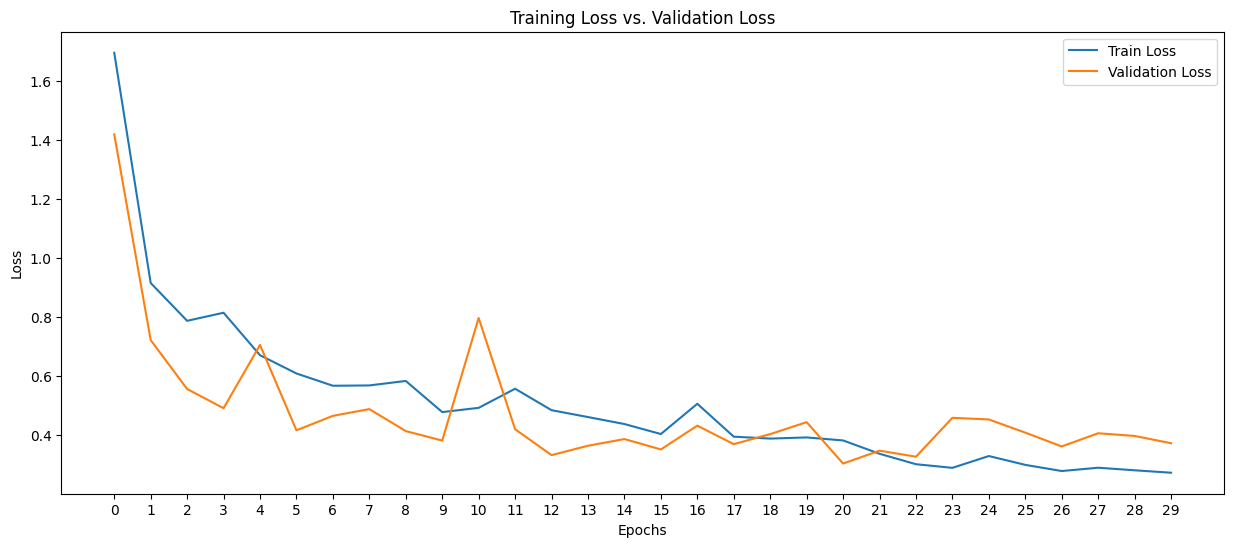

In [227]:
#Your code here
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(EPOCHS))
plt.figure(figsize=(15,6))
plt.plot(epochs, train_loss, label = 'Train Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.xticks(range(0,EPOCHS))
plt.title("Training Loss vs. Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


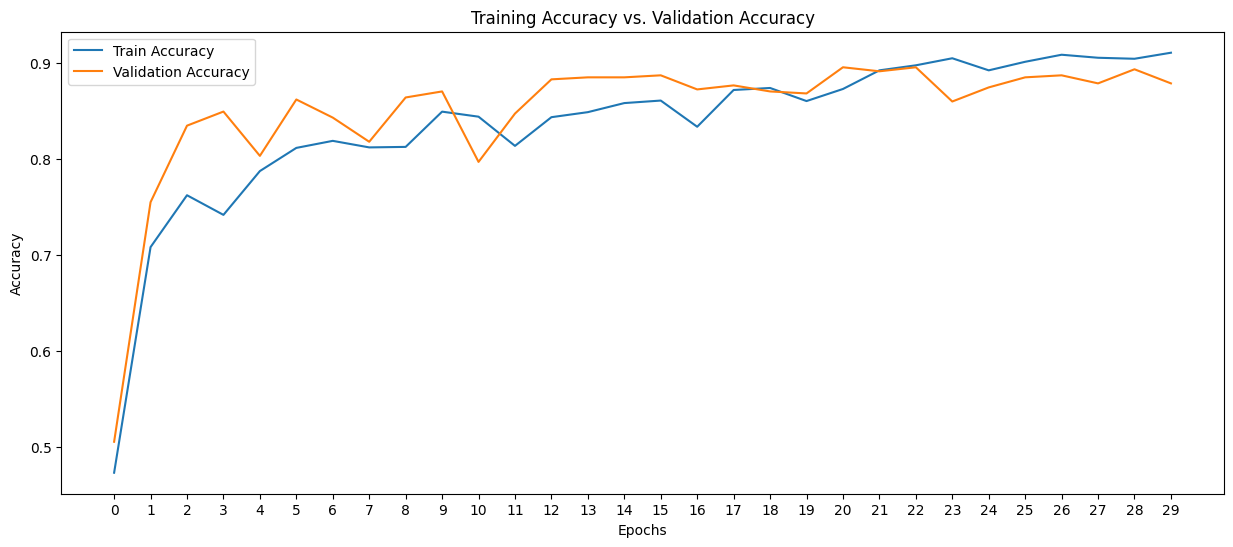

In [228]:
#Your code here
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = list(range(EPOCHS))

plt.figure(figsize=(15,6))
plt.plot(epochs, train_loss, label = 'Train Accuracy')
plt.plot(epochs, val_loss, label = 'Validation Accuracy')
plt.xticks(range(0,EPOCHS))

plt.title("Training Accuracy vs. Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

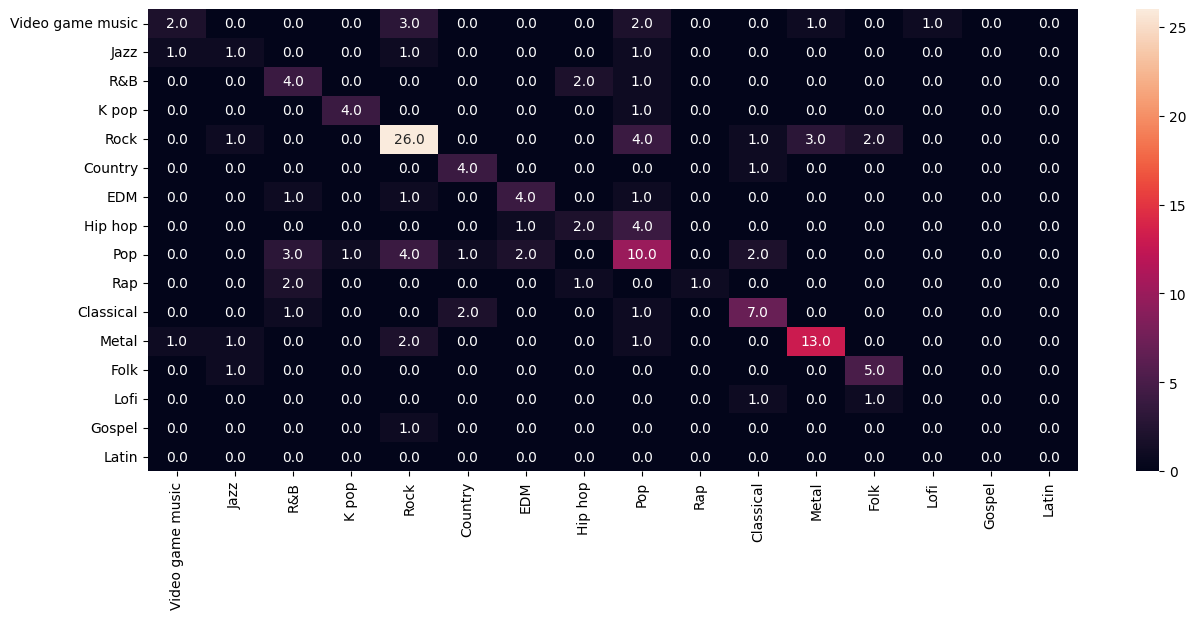

In [229]:
fig, ax = plt.subplots(figsize=(15,6))
ax =sns.heatmap(tf.math.confusion_matrix(y_test, pred_classes, num_classes, dtype=tf.dtypes.int32), annot=True, fmt=".1f", xticklabels=LABEL_MAP['Fav genre'], yticklabels=LABEL_MAP['Fav genre'])


# Improve Model via GridSearchCV

In [9]:
def build_model(optimizer):
  model = Sequential(name="conv1d_model")
  model.add(layers.Input(shape=(x_train_reshaped.shape[1],x_train_reshaped.shape[2])))
  model.add(layers.Conv1D(32, kernel_size=(3), activation='relu', name="Conv1D_1"))
  model.add(layers.MaxPooling1D(pool_size=(2), name="MaxPooling1D_1"))
  model.add(layers.Dropout(0.5))

  model.add(layers.Conv1D(128, kernel_size=(3), activation='relu', name="Conv1D_2"))
  model.add(layers.MaxPooling1D(pool_size=2, name="MaxPooling1D_2"))
  model.add(layers.BatchNormalization())
  model.add(layers.Flatten(name="Flatten_1"))

  model.add(layers.Dense(64, activation='relu', name="Dense_1"))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(num_classes, activation='softmax', name="Dense_3"))

  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model


In [11]:
optimizer = ['SGD', 'RMSprop', 'Adam']
batch_size = [16, 32, 64, 128]
epochs = [10, 30, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)

grid_model = KerasClassifier(build_fn=build_model)

grid = GridSearchCV(estimator=grid_model, param_grid=param_grid, scoring="accuracy", cv=5)
grid_result = grid.fit(x_train_reshaped, y_train)

print("Best grid score of ", grid_result.best_score_, " using parameter settings: ", grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


<ipython-input-11-4fd8c6ebfcca>:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasClassifier(build_fn=build_model)


Streaming output truncated to the last 5000 lines.
Epoch 15/30
24/24 [==============================] - 0s 18ms/step - loss: 1.1049 - accuracy: 0.6868
Epoch 16/30
24/24 [==============================] - 0s 17ms/step - loss: 1.0670 - accuracy: 0.6959
Epoch 17/30
24/24 [==============================] - 0s 16ms/step - loss: 1.0395 - accuracy: 0.7195
Epoch 18/30
24/24 [==============================] - 0s 16ms/step - loss: 1.0147 - accuracy: 0.7064
Epoch 19/30
24/24 [==============================] - 0s 19ms/step - loss: 0.9669 - accuracy: 0.7267
Epoch 20/30
24/24 [==============================] - 0s 18ms/step - loss: 0.9258 - accuracy: 0.7333
Epoch 21/30
24/24 [==============================] - 0s 17ms/step - loss: 0.8927 - accuracy: 0.7333
Epoch 22/30
24/24 [==============================] - 0s 15ms/step - loss: 0.9085 - accuracy: 0.7339
Epoch 23/30
24/24 [==============================] - 0s 15ms/step - loss: 0.8789 - accuracy: 0.7477
Epoch 24/30
24/24 [==============================

In [25]:
dump(grid_result.best_estimator_, SAVE_DIR + CHECKPOINT_FILENAME +".joblib")


['/content/drive/MyDrive/Applied ML Group 18/cnn_models/cnn-val-best.joblib']

In [44]:
best_model = keras.models.clone_model(grid_result.best_estimator_.model)
best_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
best_history = best_model.fit(x_train_reshaped, y_train_binary,
          batch_size=16,
          epochs=30,
          verbose=1,
          validation_data=(x_val_reshaped, y_val_binary))

Epoch 1/30
120/120 [==============================] - 6s 25ms/step - loss: 2.3704 - accuracy: 0.2811 - val_loss: 1.8815 - val_accuracy: 0.5639
Epoch 2/30
120/120 [==============================] - 3s 24ms/step - loss: 1.4656 - accuracy: 0.5684 - val_loss: 1.1770 - val_accuracy: 0.6876
Epoch 3/30
120/120 [==============================] - 2s 16ms/step - loss: 1.1215 - accuracy: 0.6675 - val_loss: 0.8497 - val_accuracy: 0.7820
Epoch 4/30
120/120 [==============================] - 1s 11ms/step - loss: 0.8821 - accuracy: 0.7320 - val_loss: 0.7519 - val_accuracy: 0.7547
Epoch 5/30
120/120 [==============================] - 1s 11ms/step - loss: 0.7473 - accuracy: 0.7745 - val_loss: 0.5549 - val_accuracy: 0.8239
Epoch 6/30
120/120 [==============================] - 1s 11ms/step - loss: 0.6783 - accuracy: 0.7866 - val_loss: 0.6251 - val_accuracy: 0.8029
Epoch 7/30
120/120 [==============================] - 1s 10ms/step - loss: 0.5957 - accuracy: 0.8170 - val_loss: 0.4340 - val_accuracy: 0.8847

In [48]:
best_val_score = best_model.evaluate(x_val_reshaped, y_val_binary)
print('Validation loss:', best_val_score[0])
print('Validation accuracy:', best_val_score[1])

15/15 [==============================] - 0s 9ms/step - loss: 0.2913 - accuracy: 0.8994
Validation loss: 0.2912669777870178
Validation accuracy: 0.8993710875511169


In [47]:
best_test_score = best_model.evaluate(x_test_reshaped, y_test_binary)
print('Test loss:', best_test_score[0])
print('Test accuracy:', best_test_score[1])

5/5 [==============================] - 1s 8ms/step - loss: 1.5173 - accuracy: 0.5753
Test loss: 1.5173263549804688
Test accuracy: 0.5753424763679504


In [49]:
best_preds = best_model.predict(x_test_reshaped, verbose=1)
best_pred_classes=np.argmax(best_preds,axis=1)

5/5 [==============================] - 0s 5ms/step


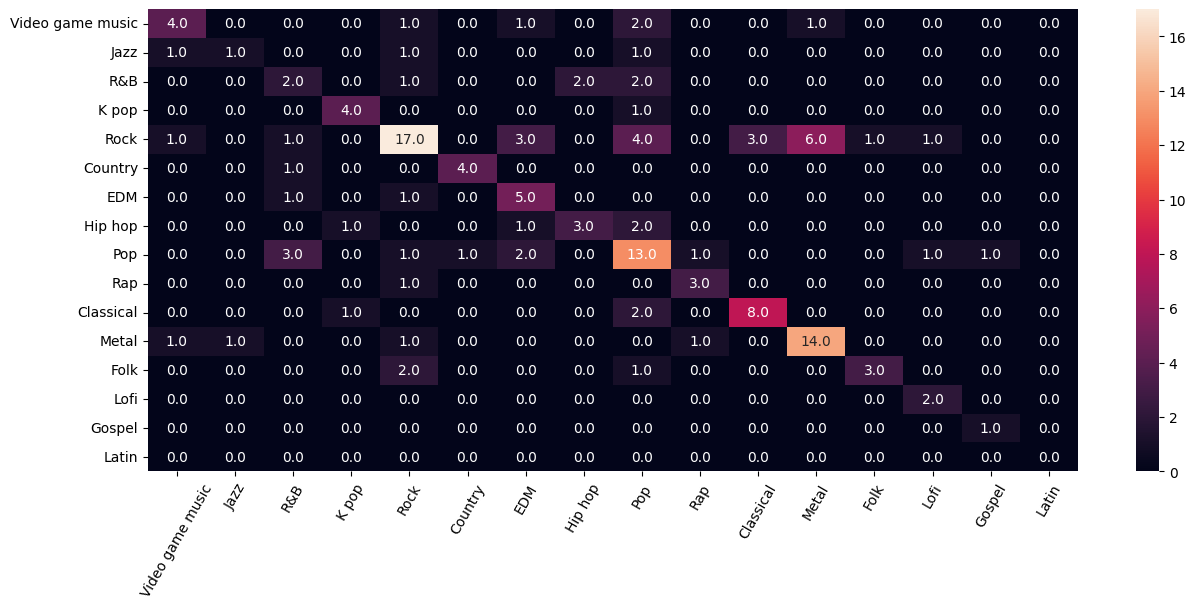

In [54]:
fig, ax = plt.subplots(figsize=(15,6))
ax =sns.heatmap(tf.math.confusion_matrix(y_test, best_pred_classes, num_classes, dtype=tf.dtypes.int32), annot=True, fmt=".1f", xticklabels=LABEL_MAP['Fav genre'], yticklabels=LABEL_MAP['Fav genre'])
plt.xticks(rotation=60)

plt.show()

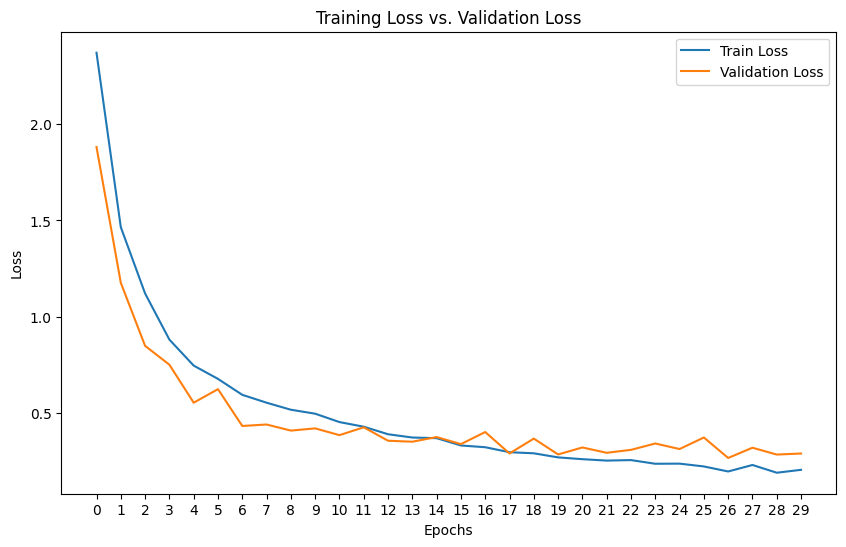

In [55]:
#Your code here
best_train_loss = best_history.history['loss']
best_val_loss = best_history.history['val_loss']
epochs = list(range(EPOCHS))
plt.figure(figsize=(10,6))
plt.plot(epochs, best_train_loss, label = 'Train Loss')
plt.plot(epochs, best_val_loss, label = 'Validation Loss')
plt.xticks(range(0,EPOCHS))
plt.title("Training Loss vs. Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



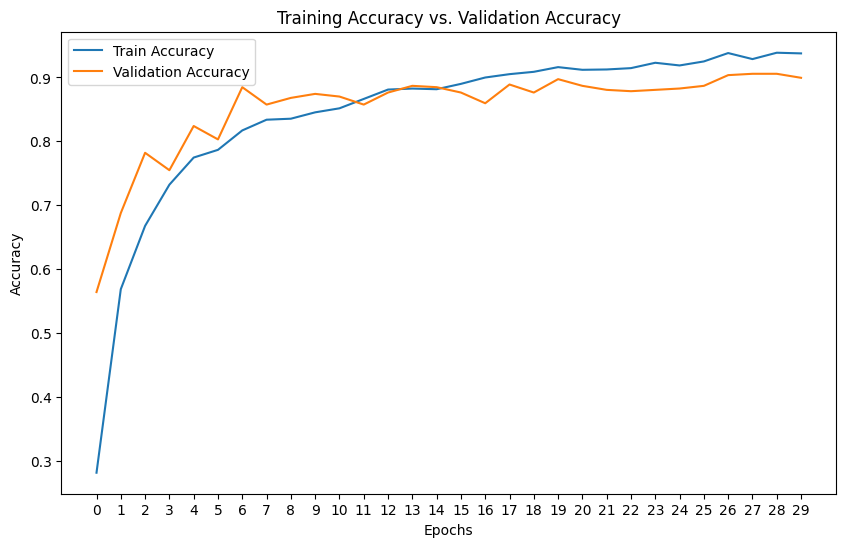

In [56]:
#Your code here
best_train_loss = best_history.history['accuracy']
best_val_loss = best_history.history['val_accuracy']
epochs = list(range(EPOCHS))

plt.figure(figsize=(10,6))
plt.plot(epochs, best_train_loss, label = 'Train Accuracy')
plt.plot(epochs, best_val_loss, label = 'Validation Accuracy')
plt.xticks(range(0,EPOCHS))

plt.title("Training Accuracy vs. Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
9plt.show()

In [86]:
labels = LABEL_MAP['Fav genre'].copy()
labels = labels.values.tolist()
labels.remove('Latin')
print(classification_report(y_test, best_pred_classes, target_names=labels))


                  precision    recall  f1-score   support

Video game music       0.57      0.44      0.50         9
            Jazz       0.50      0.25      0.33         4
             R&B       0.25      0.29      0.27         7
           K pop       0.67      0.80      0.73         5
            Rock       0.65      0.46      0.54        37
         Country       0.80      0.80      0.80         5
             EDM       0.42      0.71      0.53         7
         Hip hop       0.60      0.43      0.50         7
             Pop       0.46      0.57      0.51        23
             Rap       0.60      0.75      0.67         4
       Classical       0.73      0.73      0.73        11
           Metal       0.67      0.78      0.72        18
            Folk       0.75      0.50      0.60         6
            Lofi       0.50      1.00      0.67         2
          Gospel       0.50      1.00      0.67         1

        accuracy                           0.58       146
       macro